KNeighborsClassifier = 3

In [ ]:
pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 8.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
project_path = '/content/drive/MyDrive/Project 4 MN Home-loan Predictive Model (HMDA Data-source)/Clean_Data_For_Model'
print(os.listdir(project_path))

['Project 4 MN Home-loan Predictive Model (HMDA Data-source)', 'Cleaned_loan_data_for_model.csv', 'Fields_to_use_for_analysis.md', 'Data_Cleaning.ipynb']


# New Section

In [ ]:
# Replace with exact filename we find from the directory listing
df = pd.read_csv(f'{project_path}/Cleaned_loan_data_for_model.csv')

# Verify the data loaded correctly
print("\nFirst few rows of the data:")
print(df.head())


First few rows of the data:
   activity_year                   lei state_code       county_name  \
0           2023  254900FKD0CVFUC78457         MN      Anoka County   
1           2023  254900FKD0CVFUC78457         MN  St. Louis County   
2           2023  254900FKD0CVFUC78457         MN  St. Louis County   
3           2023  254900FKD0CVFUC78457         MN  St. Louis County   
4           2023  254900FKD0CVFUC78457         MN  St. Louis County   

  conforming_loan_limit             derived_dwelling_category  \
0            Conforming  Single Family (1-4 Units):Site-Built   
1            Conforming  Single Family (1-4 Units):Site-Built   
2            Conforming  Single Family (1-4 Units):Site-Built   
3            Conforming  Single Family (1-4 Units):Site-Built   
4            Conforming  Single Family (1-4 Units):Site-Built   

        derived_ethnicity derived_race derived_sex  action_taken  ...  \
0  Not Hispanic or Latino        Asian        Male             1  ...   
1  Not 

In [ ]:
# Separate the features, X, from the target variable, y
y = df['action_taken']
X = df.drop(columns='action_taken')

# Print shapes to verify the split
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# Display first few rows of both to verify
print("\nFirst few rows of features (X):")
print(X.head())
print("\nFirst few rows of target (y):")
print(y.head())

Features (X) shape: (78268, 23)
Target (y) shape: (78268,)

First few rows of features (X):
   activity_year                   lei state_code       county_name  \
0           2023  254900FKD0CVFUC78457         MN      Anoka County   
1           2023  254900FKD0CVFUC78457         MN  St. Louis County   
2           2023  254900FKD0CVFUC78457         MN  St. Louis County   
3           2023  254900FKD0CVFUC78457         MN  St. Louis County   
4           2023  254900FKD0CVFUC78457         MN  St. Louis County   

  conforming_loan_limit             derived_dwelling_category  \
0            Conforming  Single Family (1-4 Units):Site-Built   
1            Conforming  Single Family (1-4 Units):Site-Built   
2            Conforming  Single Family (1-4 Units):Site-Built   
3            Conforming  Single Family (1-4 Units):Site-Built   
4            Conforming  Single Family (1-4 Units):Site-Built   

        derived_ethnicity derived_race derived_sex  purchaser_type  ...  \
0  Not Hispanic

In [ ]:
# Let's look at our data types first
print("Data types of our features:")
print(X.dtypes)

# Identify numeric and categorical columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

print("\nNumeric columns:")
print(numeric_columns)
print("\nCategorical columns:")
print(categorical_columns)

# Remove or encode categorical columns
# Option 1: Drop categorical columns
X_numeric = X[numeric_columns]

# Scale only the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes
print("\nTraining set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

Data types of our features:
activity_year                          int64
lei                                   object
state_code                            object
county_name                           object
conforming_loan_limit                 object
derived_dwelling_category             object
derived_ethnicity                     object
derived_race                          object
derived_sex                           object
purchaser_type                        object
preapproval                           object
loan_type                             object
loan_purpose                          object
lien_status                           object
reverse_mortgage                      object
open-end_line_of_credit               object
loan_amount                          float64
hoepa_status                          object
income                               float64
applicant_race-1                      object
applicant_sex                         object
denial_reason-1            

In [47]:
# Train SVM model with class weights
svm_model = SVC(random_state=42, class_weight={0: 1000, 1: 1})
svm_model.fit(X_train, y_train)

# Train Logistic Regression model with class weights
log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight={0: 1000, 1: 1})
log_reg.fit(X_train, y_train)

# Make predictions with both models
svm_predictions = svm_model.predict(X_test)
log_predictions = log_reg.predict(X_test)

# Print classification reports for both models
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.99      0.01       113
           1       1.00      0.04      0.08     15541

    accuracy                           0.05     15654
   macro avg       0.50      0.52      0.05     15654
weighted avg       0.99      0.05      0.08     15654


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.97      0.01       113
           1       1.00      0.05      0.10     15541

    accuracy                           0.06     15654
   macro avg       0.50      0.51      0.06     15654
weighted avg       0.99      0.06      0.10     15654



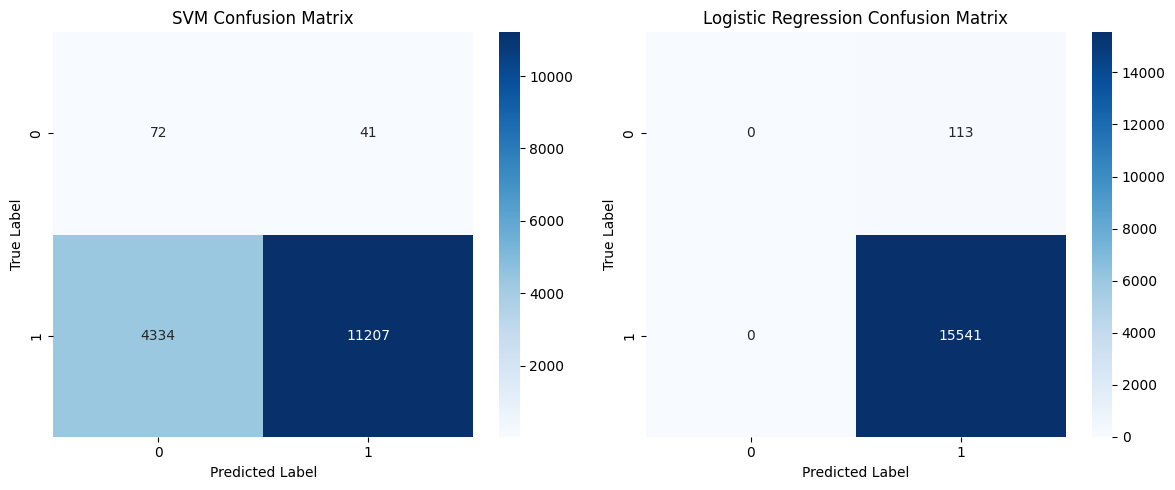

SVM Accuracy: 0.721
Logistic Regression Accuracy: 0.993


In [45]:
# Create confusion matrices
svm_cm = confusion_matrix(y_test, svm_predictions)
log_cm = confusion_matrix(y_test, log_predictions)

# Set up the matplotlib figure
plt.figure(figsize=(12, 5))

# Plot SVM confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Plot Logistic Regression confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# Print model accuracies
svm_accuracy = svm_model.score(X_test, y_test)
log_accuracy = log_reg.score(X_test, y_test)

print(f"SVM Accuracy: {svm_accuracy:.3f}")
print(f"Logistic Regression Accuracy: {log_accuracy:.3f}")